In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [2]:
# ---- Configuration ----
MODEL_PATH = "models/best_model.h5"  
TEST_DIR = "dataset/Test"
UNSEEN_DIR = "unseen_samples"  # optional folder of unseen images
IMG_SIZE = (32, 32)

In [3]:
# ---- Load model ----
model = load_model(MODEL_PATH,compile=False)
print(f"✅ Loaded model: {MODEL_PATH}")

✅ Loaded model: models/best_model.h5


In [4]:
# ---- Prepare test data ----
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

Found 13800 images belonging to 46 classes.


In [5]:
# ---- Predict on test data ----
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())


c:\Users\Lenovo\Documents\Hindi Handwriting Recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


432/432 ━━━━━━━━━━━━━━━━━━━━ 171s 396ms/step


In [6]:
# ---- Classification report ----
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))



📊 Classification Report:

                           precision    recall  f1-score   support

         character_10_yna       1.00      0.99      0.99       300
    character_11_taamatar       0.99      0.99      0.99       300
        character_12_thaa       0.99      1.00      0.99       300
         character_13_daa       0.98      0.99      0.99       300
        character_14_dhaa       0.95      0.98      0.97       300
        character_15_adna       1.00      1.00      1.00       300
      character_16_tabala       1.00      0.99      0.99       300
         character_17_tha       0.96      0.98      0.97       300
          character_18_da       0.98      0.95      0.96       300
         character_19_dha       0.99      0.98      0.98       300
           character_1_ka       1.00      0.98      0.99       300
          character_20_na       1.00      0.98      0.99       300
          character_21_pa       0.99      0.98      0.98       300
         character_22_pha       1.

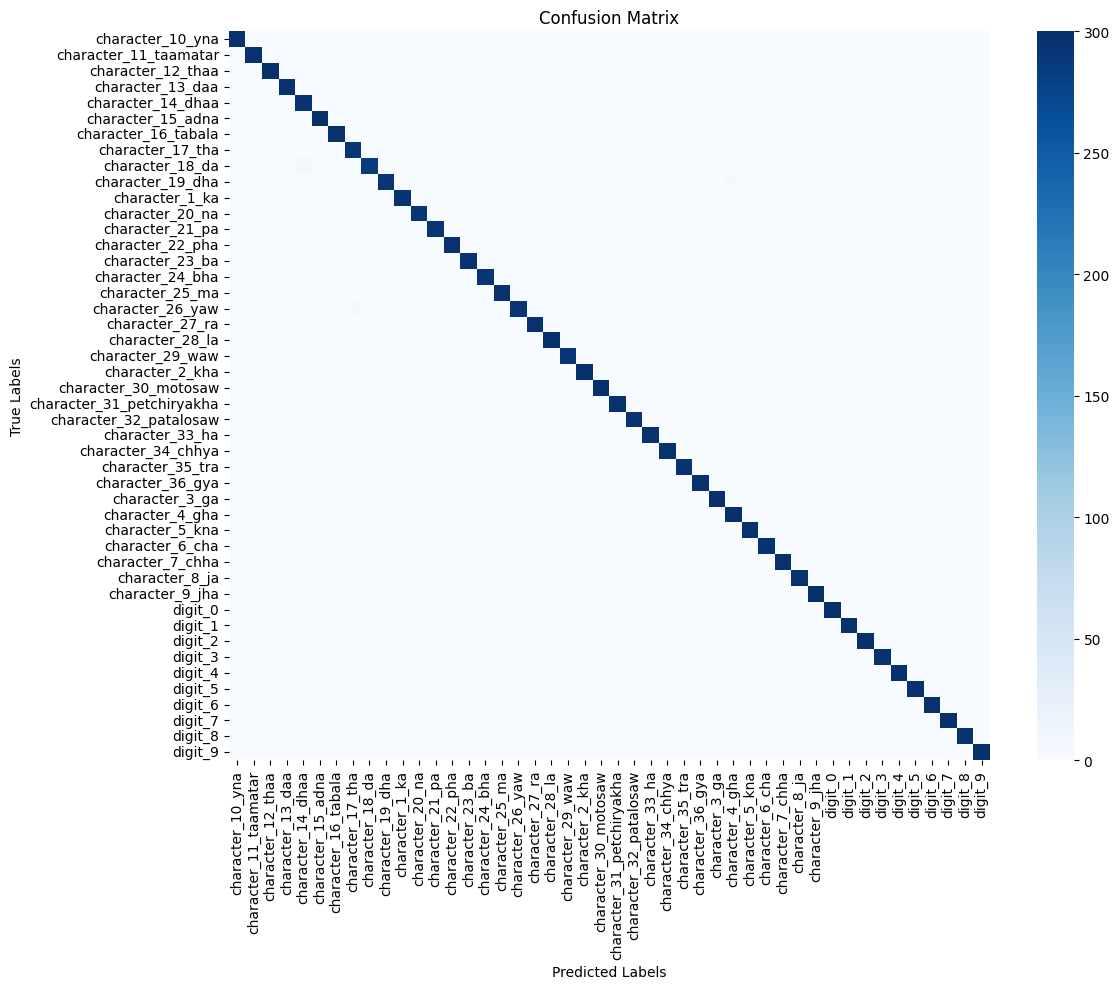

In [8]:
# ---- Confusion matrix ----
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("outputs/confusion_matrix.png")
plt.show()

In [9]:
# ---- TensorBoard log (optional) ----
log_dir = "logs/eval_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

print(f"📁 TensorBoard logs saved to: {log_dir}")
print("👉 To launch: tensorboard --logdir=logs")


📁 TensorBoard logs saved to: logs/eval_20250406-062409
👉 To launch: tensorboard --logdir=logs


In [12]:
# ---- Evaluate on unseen samples ----
def evaluate_unseen_samples(folder_path):
    print(f"\n🔍 Evaluating unseen samples from: {folder_path}\n")
    for file in os.listdir(folder_path):
        if file.endswith(".png") or file.endswith(".jpg"):
            img_path = os.path.join(folder_path, file)
            img = load_img(img_path, target_size=IMG_SIZE, color_mode="grayscale")
            img_arr = img_to_array(img) / 255.0
            img_arr = np.expand_dims(img_arr, axis=0)
            pred = model.predict(img_arr)
            predicted_class = class_labels[np.argmax(pred)]
            confidence = np.max(pred) * 100
            print(f"{file:25s} --> {predicted_class:10s} ({confidence:.2f}%)")

# ---- Call if folder exists ----
if os.path.exists(UNSEEN_DIR):
    evaluate_unseen_samples(UNSEEN_DIR)
else:
    print(f"📂 Skipping unseen samples (folder '{UNSEEN_DIR}' not found)")


🔍 Evaluating unseen samples from: unseen_samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
sample1.png               --> character_24_bha (35.73%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
sample2.png               --> character_2_kha (44.61%)
